In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
%matplotlib inline

In [44]:
import umap.plot

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Z_SYS', 'umag', 'gmag_s', 'rmag_s', 'imag_s', 'zmag_s',
       'gmag', 'gKmag', 'rmag', 'rKmag', 'imag', 'iKmag', 'zmag', 'zKmag',
       'ymag', 'yKmag', 'W1mproPM', 'W2mproPM', 'phot_bp_mean_mag',
       'phot_rp_mean_mag', 'phot_g_mean_mag', 'bp_rp_ef', 'Z_CONF',
       'SOURCE_Z_DR16Q', 'ug', 'gr', 'ri', 'iz', 'zy', 'uw1', 'gw1', 'rw1',
       'iw1', 'zw1', 'yw1', 'w12', 'bp_rp', 'bp_g', 'g_rp'],
      dtype='object')

In [39]:
df.query('Z_SYS>0', inplace=True)

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
features = ['ug', 'gr', 'ri', 'iz', 'zy', 'uw1', 'gw1', 'rw1',
       'iw1', 'zw1', 'yw1', 'w12', 'bp_rp', 'bp_g', 'g_rp']

In [40]:
df.dropna(subset=features, inplace=True)

In [41]:
df.reset_index(drop=True, inplace=True)

In [42]:
reducer = umap.UMAP(target_metric='l1')

In [43]:
mapper = reducer.fit(df[features])

In [53]:
embedding = mapper.fit_transform(df[features])

<AxesSubplot:>

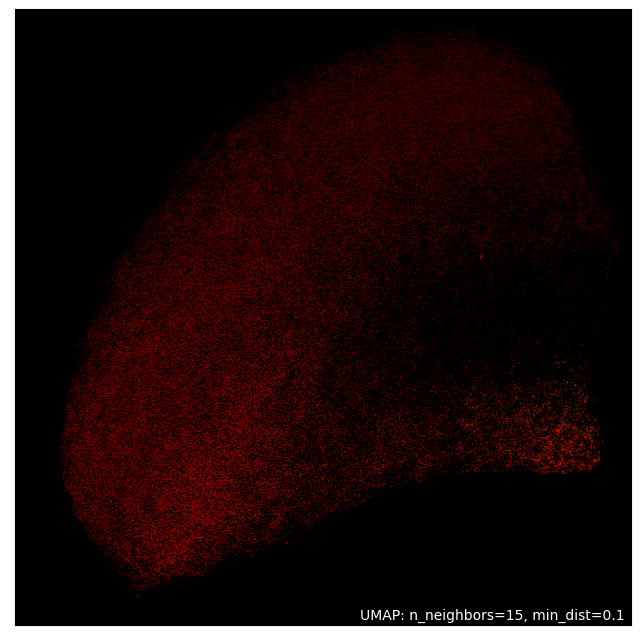

In [51]:
umap.plot.points(mapper, values=df.Z_SYS.values, 
#                  cmap='inferno', 
                 theme='fire'
                )

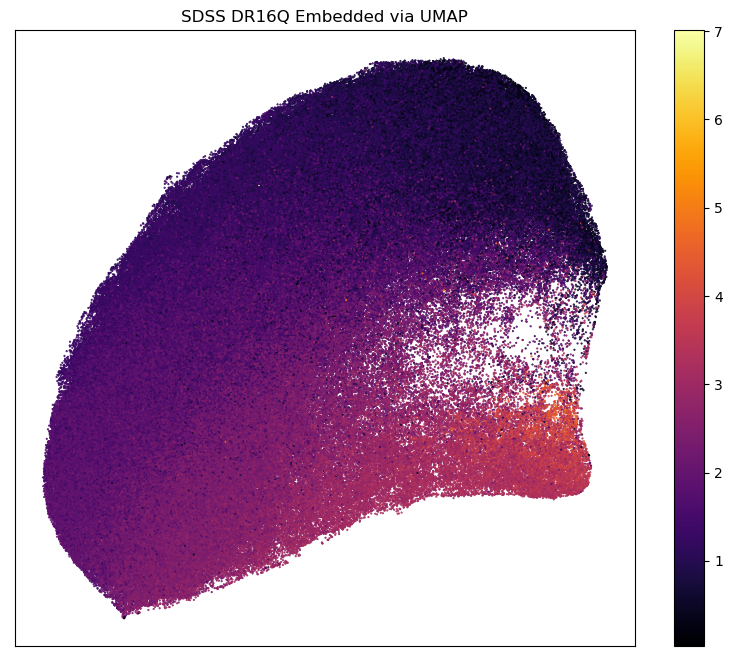

In [63]:
fig, ax = plt.subplots(1, figsize=(10, 8))
plt.scatter(*embedding.T, s=0.3, c=df.Z_SYS.values, cmap='inferno', alpha=1)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar()
# cbar.set_ticks(np.arange(10))
# cbar.set_ticklabels(classes)
plt.title('SDSS DR16Q Embedded via UMAP');